# Plotting lxy distributions of mus

### The sample files used has dark matter bound state varied from 100 to 1000Gev, dark photon mass kept at 5GeV and decay length at the lab frame at 3cm

### First we are importing all the packages required

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities) 

plt.style.use(hep.style.CMS) # plotting style defined as CMS style

In [2]:
# Following are the 6 different root files used in the first method of processing
samples = [
    "2Mu2E_100GeV_5GeV_4mm", 
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:

ch = "2mu2e"
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        "2mu2e_matchedLj"
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

ch1 = "2mu2e"
ch2 = "2mu2e_matchedLj"


Output()

Output()

# lxy distributions

## genMu lxy (matched to muLj):

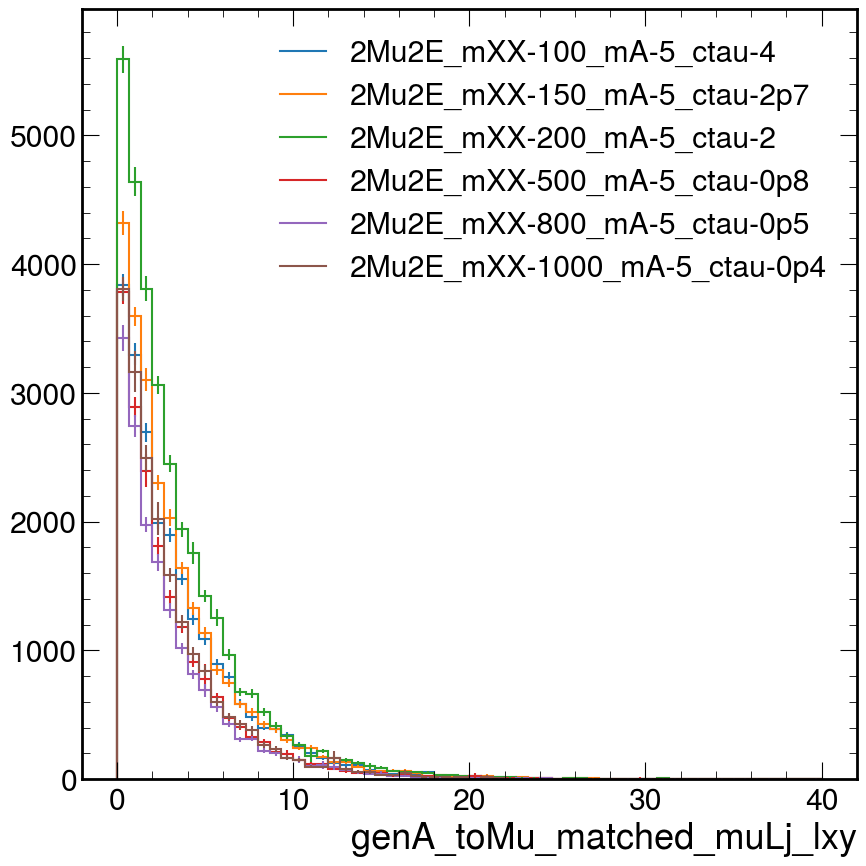

In [4]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch,:].plot()
# "genMu0_lxy_highRange" (to zoom in on [0:200] range)

plt.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_4mm')

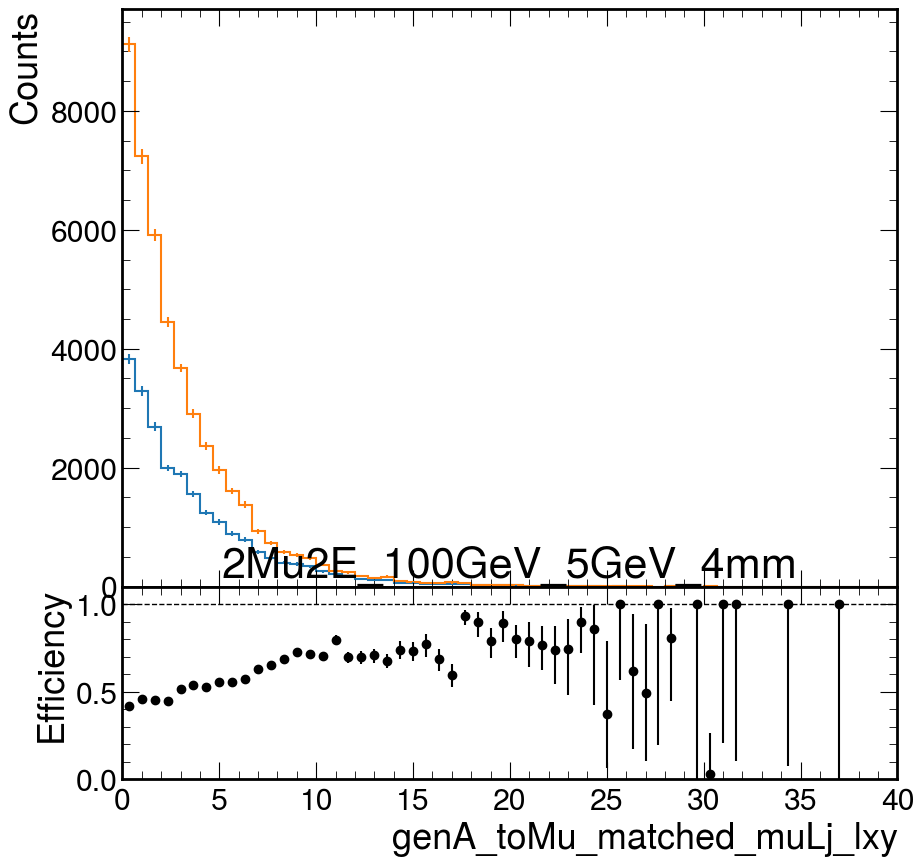

In [7]:
#ch1 = 2mu2e
#ch2 = 2mu2e_matchedLj
sample = samples[0]

output["out"][sample]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:200j].plot_ratio(
       output["out"][sample]["hists"]["genA_lxy"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

plt.title(sample)